In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_1000_5000_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_1000_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_1000_5000_100_2_5.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_1000_5000_100_2_5.csv")

In [4]:
TtotalOrdersNPC

,Unnamed: 0,time,portfolio,stock,order
0,0,993,sniel,86,1.0
1,0,993,yeqal,83,-1.0
2,2,993,yeqal,85,2.0
3,0,993,tcnoe,73,3.0
4,1,993,tcnoe,74,-3.0
...,...,...,...,...,...
2136648,2,5992,lekvh,62,16.0
2136649,0,5992,uesjc,42,5.0
2136650,3,5992,uesjc,50,-7.0
2136651,1,5992,vuemj,58,7.0


In [5]:
type(TtotalOrdersNPC)

cudf.core.dataframe.DataFrame

# minSep = 1

In [25]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192,1)

TypeError: where() missing 1 required positional argument: 'cond'

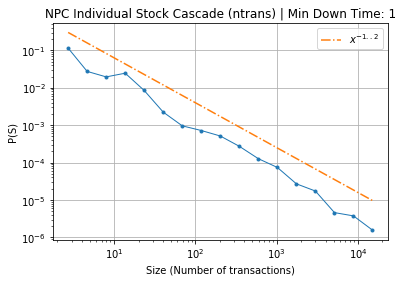

In [12]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

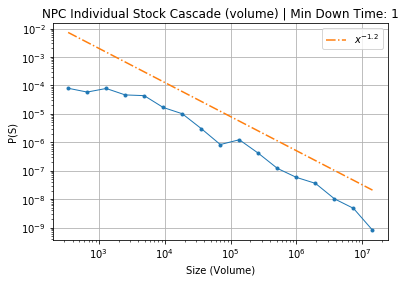

In [13]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

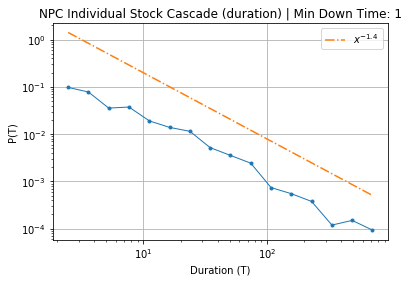

In [14]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [15]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 2)

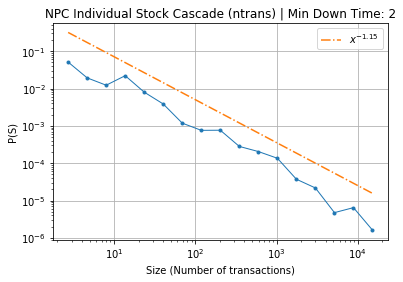

In [16]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

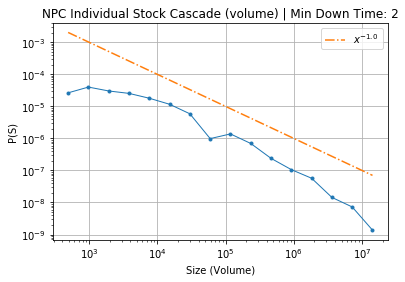

In [17]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

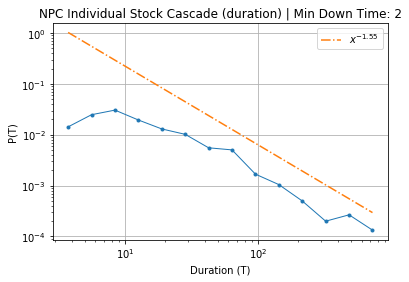

In [18]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [19]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 5)

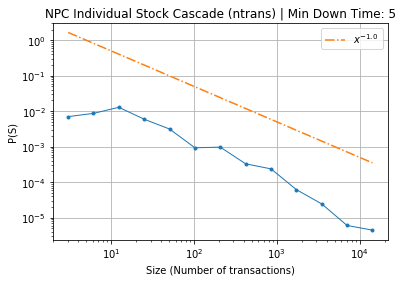

In [20]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

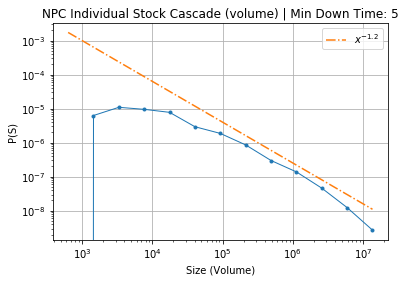

In [21]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

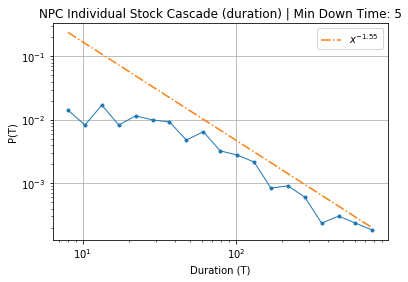

In [22]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [23]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 10)

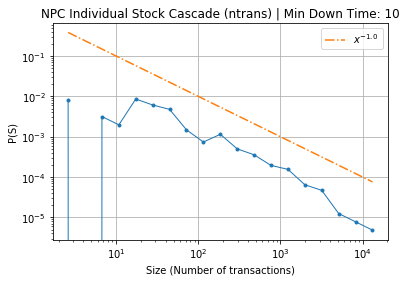

In [24]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

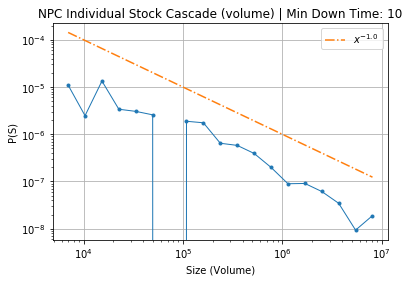

In [25]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

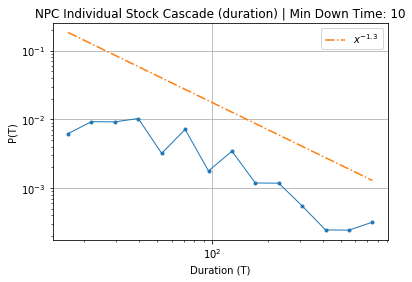

In [26]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [6]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    TtotalOrders = TtotalOrdersNPC
    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [8]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades22_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2136653
Cascade length:  5629
New Orders left:  2131024
making new cascade


OG Orders left:  2131024
Cascade length:  5282
New Orders left:  2125742
making new cascade


OG Orders left:  2125742
Cascade length:  4954
New Orders left:  2120788
making new cascade


OG Orders left:  2120788
Cascade length:  3791
New Orders left:  2116997
making new cascade


OG Orders left:  2116997


KeyboardInterrupt: 

In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades21_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades12_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2136653
Cascade length:  5481
New Orders left:  2131172
making new cascade


OG Orders left:  2131172
Cascade length:  5000
New Orders left:  2126172
making new cascade


OG Orders left:  2126172
Cascade length:  4594
New Orders left:  2121578
making new cascade


OG Orders left:  2121578
Cascade length:  950
New Orders left:  2120628
making new cascade


OG Orders left:  2120628
Cascade length:  3327
New Orders left:  2117301
making new cascade


OG Orders left:  2117301
Cascade length:  1
New Orders left:  2117300
making new cascade


OG Orders left:  2117300
Cascade length:  4528
New Orders left:  2112772
making new cascade


OG Orders left:  2112772
Cascade length:  4
New Orders left:  2112768
making new cascade


OG Orders left:  2112768
Cascade length:  4367
New Orders left:  2108401
making new cascade


OG Orders left:  2108401
Cascade length:  4298
New Orders left:  2104103
making new cascade


OG Orders left:  2104103
Cascade length:  4528
New Orders left:  20

Cascade length:  3966
New Orders left:  1938876
making new cascade


OG Orders left:  1938876
Cascade length:  2
New Orders left:  1938874
making new cascade


OG Orders left:  1938874
Cascade length:  2
New Orders left:  1938872
making new cascade


OG Orders left:  1938872
Cascade length:  2622
New Orders left:  1936250
making new cascade


OG Orders left:  1936250
Cascade length:  1
New Orders left:  1936249
making new cascade


OG Orders left:  1936249
Cascade length:  97
New Orders left:  1936152
making new cascade


OG Orders left:  1936152
Cascade length:  10
New Orders left:  1936142
making new cascade


OG Orders left:  1936142
Cascade length:  3
New Orders left:  1936139
making new cascade


OG Orders left:  1936139
Cascade length:  2798
New Orders left:  1933341
making new cascade


OG Orders left:  1933341
Cascade length:  3
New Orders left:  1933338
making new cascade


OG Orders left:  1933338
Cascade length:  2
New Orders left:  1933336
making new cascade


OG Orders lef

Cascade length:  25
New Orders left:  1869090
making new cascade


OG Orders left:  1869090
Cascade length:  117
New Orders left:  1868973
making new cascade


OG Orders left:  1868973
Cascade length:  1470
New Orders left:  1867503
making new cascade


OG Orders left:  1867503
Cascade length:  2186
New Orders left:  1865317
making new cascade


OG Orders left:  1865317
Cascade length:  1781
New Orders left:  1863536
making new cascade


OG Orders left:  1863536
Cascade length:  59
New Orders left:  1863477
making new cascade


OG Orders left:  1863477
Cascade length:  2
New Orders left:  1863475
making new cascade


OG Orders left:  1863475
Cascade length:  1743
New Orders left:  1861732
making new cascade


OG Orders left:  1861732
Cascade length:  16
New Orders left:  1861716
making new cascade


OG Orders left:  1861716
Cascade length:  45
New Orders left:  1861671
making new cascade


OG Orders left:  1861671
Cascade length:  2000
New Orders left:  1859671
making new cascade


OG 

Cascade length:  176
New Orders left:  1826726
making new cascade


OG Orders left:  1826726
Cascade length:  652
New Orders left:  1826074
making new cascade


OG Orders left:  1826074
Cascade length:  39
New Orders left:  1826035
making new cascade


OG Orders left:  1826035
Cascade length:  932
New Orders left:  1825103
making new cascade


OG Orders left:  1825103
Cascade length:  113
New Orders left:  1824990
making new cascade


OG Orders left:  1824990
Cascade length:  3
New Orders left:  1824987
making new cascade


OG Orders left:  1824987
Cascade length:  29
New Orders left:  1824958
making new cascade


OG Orders left:  1824958
Cascade length:  134
New Orders left:  1824824
making new cascade


OG Orders left:  1824824
Cascade length:  396
New Orders left:  1824428
making new cascade


OG Orders left:  1824428
Cascade length:  109
New Orders left:  1824319
making new cascade


OG Orders left:  1824319
Cascade length:  3
New Orders left:  1824316
making new cascade


OG Order

Cascade length:  97
New Orders left:  1797144
making new cascade


OG Orders left:  1797144
Cascade length:  54
New Orders left:  1797090
making new cascade


OG Orders left:  1797090
Cascade length:  725
New Orders left:  1796365
making new cascade


OG Orders left:  1796365
Cascade length:  4
New Orders left:  1796361
making new cascade


OG Orders left:  1796361
Cascade length:  3
New Orders left:  1796358
making new cascade


OG Orders left:  1796358
Cascade length:  45
New Orders left:  1796313
making new cascade


OG Orders left:  1796313
Cascade length:  95
New Orders left:  1796218
making new cascade


OG Orders left:  1796218
Cascade length:  105
New Orders left:  1796113
making new cascade


OG Orders left:  1796113
Cascade length:  14
New Orders left:  1796099
making new cascade


OG Orders left:  1796099
Cascade length:  1099
New Orders left:  1795000
making new cascade


OG Orders left:  1795000
Cascade length:  6
New Orders left:  1794994
making new cascade


OG Orders le

Cascade length:  4
New Orders left:  1771897
making new cascade


OG Orders left:  1771897
Cascade length:  7
New Orders left:  1771890
making new cascade


OG Orders left:  1771890
Cascade length:  16
New Orders left:  1771874
making new cascade


OG Orders left:  1771874
Cascade length:  5
New Orders left:  1771869
making new cascade


OG Orders left:  1771869
Cascade length:  2
New Orders left:  1771867
making new cascade


OG Orders left:  1771867
Cascade length:  2919
New Orders left:  1768948
making new cascade


OG Orders left:  1768948
Cascade length:  18
New Orders left:  1768930
making new cascade


OG Orders left:  1768930
Cascade length:  32
New Orders left:  1768898
making new cascade


OG Orders left:  1768898
Cascade length:  10
New Orders left:  1768888
making new cascade


OG Orders left:  1768888
Cascade length:  16
New Orders left:  1768872
making new cascade


OG Orders left:  1768872
Cascade length:  18
New Orders left:  1768854
making new cascade


OG Orders left:

Cascade length:  44
New Orders left:  1744268
making new cascade


OG Orders left:  1744268
Cascade length:  563
New Orders left:  1743705
making new cascade


OG Orders left:  1743705
Cascade length:  32
New Orders left:  1743673
making new cascade


OG Orders left:  1743673
Cascade length:  36
New Orders left:  1743637
making new cascade


OG Orders left:  1743637
Cascade length:  204
New Orders left:  1743433
making new cascade


OG Orders left:  1743433
Cascade length:  906
New Orders left:  1742527
making new cascade


OG Orders left:  1742527
Cascade length:  1
New Orders left:  1742526
making new cascade


OG Orders left:  1742526
Cascade length:  9
New Orders left:  1742517
making new cascade


OG Orders left:  1742517
Cascade length:  1954
New Orders left:  1740563
making new cascade


OG Orders left:  1740563
Cascade length:  14
New Orders left:  1740549
making new cascade


OG Orders left:  1740549
Cascade length:  14
New Orders left:  1740535
making new cascade


OG Orders 

Cascade length:  941
New Orders left:  1701576
making new cascade


OG Orders left:  1701576
Cascade length:  41
New Orders left:  1701535
making new cascade


OG Orders left:  1701535
Cascade length:  2363
New Orders left:  1699172
making new cascade


OG Orders left:  1699172
Cascade length:  10
New Orders left:  1699162
making new cascade


OG Orders left:  1699162
Cascade length:  1
New Orders left:  1699161
making new cascade


OG Orders left:  1699161
Cascade length:  292
New Orders left:  1698869
making new cascade


OG Orders left:  1698869
Cascade length:  31
New Orders left:  1698838
making new cascade


OG Orders left:  1698838
Cascade length:  4
New Orders left:  1698834
making new cascade


OG Orders left:  1698834
Cascade length:  714
New Orders left:  1698120
making new cascade


OG Orders left:  1698120
Cascade length:  539
New Orders left:  1697581
making new cascade


OG Orders left:  1697581
Cascade length:  65
New Orders left:  1697516
making new cascade


OG Orders

Cascade length:  1950
New Orders left:  1666799
making new cascade


OG Orders left:  1666799
Cascade length:  16
New Orders left:  1666783
making new cascade


OG Orders left:  1666783
Cascade length:  316
New Orders left:  1666467
making new cascade


OG Orders left:  1666467
Cascade length:  16
New Orders left:  1666451
making new cascade


OG Orders left:  1666451
Cascade length:  27
New Orders left:  1666424
making new cascade


OG Orders left:  1666424
Cascade length:  5
New Orders left:  1666419
making new cascade


OG Orders left:  1666419
Cascade length:  16
New Orders left:  1666403
making new cascade


OG Orders left:  1666403
Cascade length:  9
New Orders left:  1666394
making new cascade


OG Orders left:  1666394
Cascade length:  17
New Orders left:  1666377
making new cascade


OG Orders left:  1666377
Cascade length:  45
New Orders left:  1666332
making new cascade


OG Orders left:  1666332
Cascade length:  175
New Orders left:  1666157
making new cascade


OG Orders l

Cascade length:  47
New Orders left:  1640630
making new cascade


OG Orders left:  1640630
Cascade length:  511
New Orders left:  1640119
making new cascade


OG Orders left:  1640119
Cascade length:  4
New Orders left:  1640115
making new cascade


OG Orders left:  1640115
Cascade length:  137
New Orders left:  1639978
making new cascade


OG Orders left:  1639978
Cascade length:  9
New Orders left:  1639969
making new cascade


OG Orders left:  1639969
Cascade length:  4
New Orders left:  1639965
making new cascade


OG Orders left:  1639965
Cascade length:  1926
New Orders left:  1638039
making new cascade


OG Orders left:  1638039
Cascade length:  13
New Orders left:  1638026
making new cascade


OG Orders left:  1638026
Cascade length:  790
New Orders left:  1637236
making new cascade


OG Orders left:  1637236
Cascade length:  2350
New Orders left:  1634886
making new cascade


OG Orders left:  1634886
Cascade length:  10
New Orders left:  1634876
making new cascade


OG Orders

Cascade length:  350
New Orders left:  1600978
making new cascade


OG Orders left:  1600978
Cascade length:  1905
New Orders left:  1599073
making new cascade


OG Orders left:  1599073
Cascade length:  4
New Orders left:  1599069
making new cascade


OG Orders left:  1599069
Cascade length:  1568
New Orders left:  1597501
making new cascade


OG Orders left:  1597501
Cascade length:  7
New Orders left:  1597494
making new cascade


OG Orders left:  1597494
Cascade length:  12
New Orders left:  1597482
making new cascade


OG Orders left:  1597482
Cascade length:  980
New Orders left:  1596502
making new cascade


OG Orders left:  1596502
Cascade length:  1485
New Orders left:  1595017
making new cascade


OG Orders left:  1595017
Cascade length:  14
New Orders left:  1595003
making new cascade


OG Orders left:  1595003
Cascade length:  20
New Orders left:  1594983
making new cascade


OG Orders left:  1594983
Cascade length:  697
New Orders left:  1594286
making new cascade


OG Ord

Cascade length:  1682
New Orders left:  1557748
making new cascade


OG Orders left:  1557748
Cascade length:  20
New Orders left:  1557728
making new cascade


OG Orders left:  1557728
Cascade length:  1729
New Orders left:  1555999
making new cascade


OG Orders left:  1555999
Cascade length:  2
New Orders left:  1555997
making new cascade


OG Orders left:  1555997
Cascade length:  1
New Orders left:  1555996
making new cascade


OG Orders left:  1555996
Cascade length:  1432
New Orders left:  1554564
making new cascade


OG Orders left:  1554564
Cascade length:  72
New Orders left:  1554492
making new cascade


OG Orders left:  1554492
Cascade length:  10
New Orders left:  1554482
making new cascade


OG Orders left:  1554482
Cascade length:  236
New Orders left:  1554246
making new cascade


OG Orders left:  1554246
Cascade length:  2
New Orders left:  1554244
making new cascade


OG Orders left:  1554244
Cascade length:  2
New Orders left:  1554242
making new cascade


OG Orders 

Cascade length:  2
New Orders left:  1522240
making new cascade


OG Orders left:  1522240
Cascade length:  10
New Orders left:  1522230
making new cascade


OG Orders left:  1522230
Cascade length:  2
New Orders left:  1522228
making new cascade


OG Orders left:  1522228
Cascade length:  527
New Orders left:  1521701
making new cascade


OG Orders left:  1521701
Cascade length:  5
New Orders left:  1521696
making new cascade


OG Orders left:  1521696
Cascade length:  589
New Orders left:  1521107
making new cascade


OG Orders left:  1521107
Cascade length:  8
New Orders left:  1521099
making new cascade


OG Orders left:  1521099
Cascade length:  544
New Orders left:  1520555
making new cascade


OG Orders left:  1520555
Cascade length:  208
New Orders left:  1520347
making new cascade


OG Orders left:  1520347
Cascade length:  53
New Orders left:  1520294
making new cascade


OG Orders left:  1520294
Cascade length:  643
New Orders left:  1519651
making new cascade


OG Orders le

Cascade length:  50
New Orders left:  1490934
making new cascade


OG Orders left:  1490934
Cascade length:  8
New Orders left:  1490926
making new cascade


OG Orders left:  1490926
Cascade length:  16
New Orders left:  1490910
making new cascade


OG Orders left:  1490910
Cascade length:  2
New Orders left:  1490908
making new cascade


OG Orders left:  1490908
Cascade length:  16
New Orders left:  1490892
making new cascade


OG Orders left:  1490892
Cascade length:  1684
New Orders left:  1489208
making new cascade


OG Orders left:  1489208
Cascade length:  709
New Orders left:  1488499
making new cascade


OG Orders left:  1488499
Cascade length:  2
New Orders left:  1488497
making new cascade


OG Orders left:  1488497
Cascade length:  2338
New Orders left:  1486159
making new cascade


OG Orders left:  1486159
Cascade length:  1395
New Orders left:  1484764
making new cascade


OG Orders left:  1484764
Cascade length:  4
New Orders left:  1484760
making new cascade


OG Orders 

Cascade length:  2204
New Orders left:  1446304
making new cascade


OG Orders left:  1446304
Cascade length:  6
New Orders left:  1446298
making new cascade


OG Orders left:  1446298
Cascade length:  33
New Orders left:  1446265
making new cascade


OG Orders left:  1446265
Cascade length:  2
New Orders left:  1446263
making new cascade


OG Orders left:  1446263
Cascade length:  2
New Orders left:  1446261
making new cascade


OG Orders left:  1446261
Cascade length:  480
New Orders left:  1445781
making new cascade


OG Orders left:  1445781
Cascade length:  37
New Orders left:  1445744
making new cascade


OG Orders left:  1445744
Cascade length:  381
New Orders left:  1445363
making new cascade


OG Orders left:  1445363
Cascade length:  4
New Orders left:  1445359
making new cascade


OG Orders left:  1445359
Cascade length:  4
New Orders left:  1445355
making new cascade


OG Orders left:  1445355
Cascade length:  285
New Orders left:  1445070
making new cascade


OG Orders lef

Cascade length:  22
New Orders left:  1404487
making new cascade


OG Orders left:  1404487
Cascade length:  6
New Orders left:  1404481
making new cascade


OG Orders left:  1404481
Cascade length:  1558
New Orders left:  1402923
making new cascade


OG Orders left:  1402923
Cascade length:  2
New Orders left:  1402921
making new cascade


OG Orders left:  1402921
Cascade length:  100
New Orders left:  1402821
making new cascade


OG Orders left:  1402821
Cascade length:  3061
New Orders left:  1399760
making new cascade


OG Orders left:  1399760
Cascade length:  24
New Orders left:  1399736
making new cascade


OG Orders left:  1399736
Cascade length:  18
New Orders left:  1399718
making new cascade


OG Orders left:  1399718
Cascade length:  107
New Orders left:  1399611
making new cascade


OG Orders left:  1399611
Cascade length:  122
New Orders left:  1399489
making new cascade


OG Orders left:  1399489
Cascade length:  33
New Orders left:  1399456
making new cascade


OG Order

Cascade length:  8
New Orders left:  1362653
making new cascade


OG Orders left:  1362653
Cascade length:  246
New Orders left:  1362407
making new cascade


OG Orders left:  1362407
Cascade length:  2
New Orders left:  1362405
making new cascade


OG Orders left:  1362405
Cascade length:  87
New Orders left:  1362318
making new cascade


OG Orders left:  1362318
Cascade length:  1675
New Orders left:  1360643
making new cascade


OG Orders left:  1360643
Cascade length:  22
New Orders left:  1360621
making new cascade


OG Orders left:  1360621
Cascade length:  273
New Orders left:  1360348
making new cascade


OG Orders left:  1360348
Cascade length:  24
New Orders left:  1360324
making new cascade


OG Orders left:  1360324
Cascade length:  1863
New Orders left:  1358461
making new cascade


OG Orders left:  1358461
Cascade length:  2
New Orders left:  1358459
making new cascade


OG Orders left:  1358459
Cascade length:  672
New Orders left:  1357787
making new cascade


OG Orders

Cascade length:  49
New Orders left:  1324020
making new cascade


OG Orders left:  1324020
Cascade length:  25
New Orders left:  1323995
making new cascade


OG Orders left:  1323995
Cascade length:  4
New Orders left:  1323991
making new cascade


OG Orders left:  1323991
Cascade length:  130
New Orders left:  1323861
making new cascade


OG Orders left:  1323861
Cascade length:  227
New Orders left:  1323634
making new cascade


OG Orders left:  1323634
Cascade length:  1555
New Orders left:  1322079
making new cascade


OG Orders left:  1322079
Cascade length:  1877
New Orders left:  1320202
making new cascade


OG Orders left:  1320202
Cascade length:  5
New Orders left:  1320197
making new cascade


OG Orders left:  1320197
Cascade length:  2
New Orders left:  1320195
making new cascade


OG Orders left:  1320195
Cascade length:  1767
New Orders left:  1318428
making new cascade


OG Orders left:  1318428
Cascade length:  20
New Orders left:  1318408
making new cascade


OG Order

Cascade length:  677
New Orders left:  1291470
making new cascade


OG Orders left:  1291470
Cascade length:  437
New Orders left:  1291033
making new cascade


OG Orders left:  1291033
Cascade length:  1
New Orders left:  1291032
making new cascade


OG Orders left:  1291032
Cascade length:  4
New Orders left:  1291028
making new cascade


OG Orders left:  1291028
Cascade length:  6
New Orders left:  1291022
making new cascade


OG Orders left:  1291022
Cascade length:  2
New Orders left:  1291020
making new cascade


OG Orders left:  1291020
Cascade length:  1671
New Orders left:  1289349
making new cascade


OG Orders left:  1289349
Cascade length:  958
New Orders left:  1288391
making new cascade


OG Orders left:  1288391
Cascade length:  36
New Orders left:  1288355
making new cascade


OG Orders left:  1288355
Cascade length:  22
New Orders left:  1288333
making new cascade


OG Orders left:  1288333
Cascade length:  708
New Orders left:  1287625
making new cascade


OG Orders l

Cascade length:  8
New Orders left:  1263871
making new cascade


OG Orders left:  1263871
Cascade length:  19
New Orders left:  1263852
making new cascade


OG Orders left:  1263852
Cascade length:  5
New Orders left:  1263847
making new cascade


OG Orders left:  1263847
Cascade length:  9
New Orders left:  1263838
making new cascade


OG Orders left:  1263838
Cascade length:  78
New Orders left:  1263760
making new cascade


OG Orders left:  1263760
Cascade length:  1236
New Orders left:  1262524
making new cascade


OG Orders left:  1262524
Cascade length:  207
New Orders left:  1262317
making new cascade


OG Orders left:  1262317
Cascade length:  12
New Orders left:  1262305
making new cascade


OG Orders left:  1262305
Cascade length:  2309
New Orders left:  1259996
making new cascade


OG Orders left:  1259996
Cascade length:  12
New Orders left:  1259984
making new cascade


OG Orders left:  1259984
Cascade length:  14
New Orders left:  1259970
making new cascade


OG Orders l

Cascade length:  56
New Orders left:  1245313
making new cascade


OG Orders left:  1245313
Cascade length:  30
New Orders left:  1245283
making new cascade


OG Orders left:  1245283
Cascade length:  8
New Orders left:  1245275
making new cascade


OG Orders left:  1245275
Cascade length:  31
New Orders left:  1245244
making new cascade


OG Orders left:  1245244
Cascade length:  56
New Orders left:  1245188
making new cascade


OG Orders left:  1245188
Cascade length:  45
New Orders left:  1245143
making new cascade


OG Orders left:  1245143
Cascade length:  35
New Orders left:  1245108
making new cascade


OG Orders left:  1245108
Cascade length:  59
New Orders left:  1245049
making new cascade


OG Orders left:  1245049
Cascade length:  678
New Orders left:  1244371
making new cascade


OG Orders left:  1244371
Cascade length:  93
New Orders left:  1244278
making new cascade


OG Orders left:  1244278
Cascade length:  22
New Orders left:  1244256
making new cascade


OG Orders lef

Cascade length:  1403
New Orders left:  1216598
making new cascade


OG Orders left:  1216598
Cascade length:  136
New Orders left:  1216462
making new cascade


OG Orders left:  1216462
Cascade length:  2
New Orders left:  1216460
making new cascade


OG Orders left:  1216460
Cascade length:  1343
New Orders left:  1215117
making new cascade


OG Orders left:  1215117
Cascade length:  2
New Orders left:  1215115
making new cascade


OG Orders left:  1215115
Cascade length:  2045
New Orders left:  1213070
making new cascade


OG Orders left:  1213070
Cascade length:  31
New Orders left:  1213039
making new cascade


OG Orders left:  1213039
Cascade length:  4
New Orders left:  1213035
making new cascade


OG Orders left:  1213035
Cascade length:  16
New Orders left:  1213019
making new cascade


OG Orders left:  1213019
Cascade length:  1
New Orders left:  1213018
making new cascade


OG Orders left:  1213018
Cascade length:  2
New Orders left:  1213016
making new cascade


OG Orders l

Cascade length:  13
New Orders left:  1185451
making new cascade


OG Orders left:  1185451
Cascade length:  37
New Orders left:  1185414
making new cascade


OG Orders left:  1185414
Cascade length:  154
New Orders left:  1185260
making new cascade


OG Orders left:  1185260
Cascade length:  77
New Orders left:  1185183
making new cascade


OG Orders left:  1185183
Cascade length:  1232
New Orders left:  1183951
making new cascade


OG Orders left:  1183951
Cascade length:  11
New Orders left:  1183940
making new cascade


OG Orders left:  1183940
Cascade length:  2546
New Orders left:  1181394
making new cascade


OG Orders left:  1181394
Cascade length:  1124
New Orders left:  1180270
making new cascade


OG Orders left:  1180270
Cascade length:  12
New Orders left:  1180258
making new cascade


OG Orders left:  1180258
Cascade length:  34
New Orders left:  1180224
making new cascade


OG Orders left:  1180224
Cascade length:  22
New Orders left:  1180202
making new cascade


OG Ord

Cascade length:  43
New Orders left:  1148872
making new cascade


OG Orders left:  1148872
Cascade length:  40
New Orders left:  1148832
making new cascade


OG Orders left:  1148832
Cascade length:  929
New Orders left:  1147903
making new cascade


OG Orders left:  1147903
Cascade length:  4
New Orders left:  1147899
making new cascade


OG Orders left:  1147899
Cascade length:  40
New Orders left:  1147859
making new cascade


OG Orders left:  1147859
Cascade length:  1109
New Orders left:  1146750
making new cascade


OG Orders left:  1146750
Cascade length:  6
New Orders left:  1146744
making new cascade


OG Orders left:  1146744
Cascade length:  1474
New Orders left:  1145270
making new cascade


OG Orders left:  1145270
Cascade length:  23
New Orders left:  1145247
making new cascade


OG Orders left:  1145247
Cascade length:  76
New Orders left:  1145171
making new cascade


OG Orders left:  1145171
Cascade length:  99
New Orders left:  1145072
making new cascade


OG Orders 

Cascade length:  7
New Orders left:  1113116
making new cascade


OG Orders left:  1113116
Cascade length:  2035
New Orders left:  1111081
making new cascade


OG Orders left:  1111081
Cascade length:  78
New Orders left:  1111003
making new cascade


OG Orders left:  1111003
Cascade length:  119
New Orders left:  1110884
making new cascade


OG Orders left:  1110884
Cascade length:  32
New Orders left:  1110852
making new cascade


OG Orders left:  1110852
Cascade length:  11
New Orders left:  1110841
making new cascade


OG Orders left:  1110841
Cascade length:  55
New Orders left:  1110786
making new cascade


OG Orders left:  1110786
Cascade length:  2
New Orders left:  1110784
making new cascade


OG Orders left:  1110784
Cascade length:  24
New Orders left:  1110760
making new cascade


OG Orders left:  1110760
Cascade length:  416
New Orders left:  1110344
making new cascade


OG Orders left:  1110344
Cascade length:  12
New Orders left:  1110332
making new cascade


OG Orders l

Cascade length:  36
New Orders left:  1068496
making new cascade


OG Orders left:  1068496
Cascade length:  24
New Orders left:  1068472
making new cascade


OG Orders left:  1068472
Cascade length:  1074
New Orders left:  1067398
making new cascade


OG Orders left:  1067398
Cascade length:  39
New Orders left:  1067359
making new cascade


OG Orders left:  1067359
Cascade length:  2052
New Orders left:  1065307
making new cascade


OG Orders left:  1065307
Cascade length:  1
New Orders left:  1065306
making new cascade


OG Orders left:  1065306
Cascade length:  7
New Orders left:  1065299
making new cascade


OG Orders left:  1065299
Cascade length:  11
New Orders left:  1065288
making new cascade


OG Orders left:  1065288
Cascade length:  429
New Orders left:  1064859
making new cascade


OG Orders left:  1064859
Cascade length:  65
New Orders left:  1064794
making new cascade


OG Orders left:  1064794
Cascade length:  27
New Orders left:  1064767
making new cascade


OG Orders 

Cascade length:  1
New Orders left:  1043645
making new cascade


OG Orders left:  1043645
Cascade length:  248
New Orders left:  1043397
making new cascade


OG Orders left:  1043397
Cascade length:  2
New Orders left:  1043395
making new cascade


OG Orders left:  1043395
Cascade length:  18
New Orders left:  1043377
making new cascade


OG Orders left:  1043377
Cascade length:  1970
New Orders left:  1041407
making new cascade


OG Orders left:  1041407
Cascade length:  13
New Orders left:  1041394
making new cascade


OG Orders left:  1041394
Cascade length:  10
New Orders left:  1041384
making new cascade


OG Orders left:  1041384
Cascade length:  120
New Orders left:  1041264
making new cascade


OG Orders left:  1041264
Cascade length:  1783
New Orders left:  1039481
making new cascade


OG Orders left:  1039481
Cascade length:  1606
New Orders left:  1037875
making new cascade


OG Orders left:  1037875
Cascade length:  634
New Orders left:  1037241
making new cascade


OG Ord

Cascade length:  47
New Orders left:  1011882
making new cascade


OG Orders left:  1011882
Cascade length:  4
New Orders left:  1011878
making new cascade


OG Orders left:  1011878
Cascade length:  2
New Orders left:  1011876
making new cascade


OG Orders left:  1011876
Cascade length:  160
New Orders left:  1011716
making new cascade


OG Orders left:  1011716
Cascade length:  1
New Orders left:  1011715
making new cascade


OG Orders left:  1011715
Cascade length:  2
New Orders left:  1011713
making new cascade


OG Orders left:  1011713
Cascade length:  29
New Orders left:  1011684
making new cascade


OG Orders left:  1011684
Cascade length:  1
New Orders left:  1011683
making new cascade


OG Orders left:  1011683
Cascade length:  4
New Orders left:  1011679
making new cascade


OG Orders left:  1011679
Cascade length:  1133
New Orders left:  1010546
making new cascade


OG Orders left:  1010546
Cascade length:  9
New Orders left:  1010537
making new cascade


OG Orders left:  

Cascade length:  1
New Orders left:  978878
making new cascade


OG Orders left:  978878
Cascade length:  16
New Orders left:  978862
making new cascade


OG Orders left:  978862
Cascade length:  36
New Orders left:  978826
making new cascade


OG Orders left:  978826
Cascade length:  419
New Orders left:  978407
making new cascade


OG Orders left:  978407
Cascade length:  259
New Orders left:  978148
making new cascade


OG Orders left:  978148
Cascade length:  2
New Orders left:  978146
making new cascade


OG Orders left:  978146
Cascade length:  1397
New Orders left:  976749
making new cascade


OG Orders left:  976749
Cascade length:  143
New Orders left:  976606
making new cascade


OG Orders left:  976606
Cascade length:  1190
New Orders left:  975416
making new cascade


OG Orders left:  975416
Cascade length:  3
New Orders left:  975413
making new cascade


OG Orders left:  975413
Cascade length:  4
New Orders left:  975409
making new cascade


OG Orders left:  975409
Cascade

Cascade length:  1027
New Orders left:  955375
making new cascade


OG Orders left:  955375
Cascade length:  10
New Orders left:  955365
making new cascade


OG Orders left:  955365
Cascade length:  1468
New Orders left:  953897
making new cascade


OG Orders left:  953897
Cascade length:  17
New Orders left:  953880
making new cascade


OG Orders left:  953880
Cascade length:  6
New Orders left:  953874
making new cascade


OG Orders left:  953874
Cascade length:  22
New Orders left:  953852
making new cascade


OG Orders left:  953852
Cascade length:  1
New Orders left:  953851
making new cascade


OG Orders left:  953851
Cascade length:  1
New Orders left:  953850
making new cascade


OG Orders left:  953850
Cascade length:  40
New Orders left:  953810
making new cascade


OG Orders left:  953810
Cascade length:  101
New Orders left:  953709
making new cascade


OG Orders left:  953709
Cascade length:  1459
New Orders left:  952250
making new cascade


OG Orders left:  952250
Cascad

Cascade length:  1
New Orders left:  934866
making new cascade


OG Orders left:  934866
Cascade length:  2
New Orders left:  934864
making new cascade


OG Orders left:  934864
Cascade length:  2
New Orders left:  934862
making new cascade


OG Orders left:  934862
Cascade length:  1
New Orders left:  934861
making new cascade


OG Orders left:  934861
Cascade length:  8
New Orders left:  934853
making new cascade


OG Orders left:  934853
Cascade length:  1070
New Orders left:  933783
making new cascade


OG Orders left:  933783
Cascade length:  19
New Orders left:  933764
making new cascade


OG Orders left:  933764
Cascade length:  371
New Orders left:  933393
making new cascade


OG Orders left:  933393
Cascade length:  3
New Orders left:  933390
making new cascade


OG Orders left:  933390
Cascade length:  1
New Orders left:  933389
making new cascade


OG Orders left:  933389
Cascade length:  2
New Orders left:  933387
making new cascade


OG Orders left:  933387
Cascade length:

Cascade length:  16
New Orders left:  916181
making new cascade


OG Orders left:  916181
Cascade length:  159
New Orders left:  916022
making new cascade


OG Orders left:  916022
Cascade length:  2218
New Orders left:  913804
making new cascade


OG Orders left:  913804
Cascade length:  1531
New Orders left:  912273
making new cascade


OG Orders left:  912273
Cascade length:  18
New Orders left:  912255
making new cascade


OG Orders left:  912255
Cascade length:  11
New Orders left:  912244
making new cascade


OG Orders left:  912244
Cascade length:  257
New Orders left:  911987
making new cascade


OG Orders left:  911987
Cascade length:  851
New Orders left:  911136
making new cascade


OG Orders left:  911136
Cascade length:  21
New Orders left:  911115
making new cascade


OG Orders left:  911115
Cascade length:  1173
New Orders left:  909942
making new cascade


OG Orders left:  909942
Cascade length:  170
New Orders left:  909772
making new cascade


OG Orders left:  909772


Cascade length:  6
New Orders left:  889380
making new cascade


OG Orders left:  889380
Cascade length:  2
New Orders left:  889378
making new cascade


OG Orders left:  889378
Cascade length:  204
New Orders left:  889174
making new cascade


OG Orders left:  889174
Cascade length:  2
New Orders left:  889172
making new cascade


OG Orders left:  889172
Cascade length:  23
New Orders left:  889149
making new cascade


OG Orders left:  889149
Cascade length:  5
New Orders left:  889144
making new cascade


OG Orders left:  889144
Cascade length:  393
New Orders left:  888751
making new cascade


OG Orders left:  888751
Cascade length:  477
New Orders left:  888274
making new cascade


OG Orders left:  888274
Cascade length:  1
New Orders left:  888273
making new cascade


OG Orders left:  888273
Cascade length:  909
New Orders left:  887364
making new cascade


OG Orders left:  887364
Cascade length:  2
New Orders left:  887362
making new cascade


OG Orders left:  887362
Cascade leng

Cascade length:  42
New Orders left:  861151
making new cascade


OG Orders left:  861151
Cascade length:  2267
New Orders left:  858884
making new cascade


OG Orders left:  858884
Cascade length:  49
New Orders left:  858835
making new cascade


OG Orders left:  858835
Cascade length:  60
New Orders left:  858775
making new cascade


OG Orders left:  858775
Cascade length:  12
New Orders left:  858763
making new cascade


OG Orders left:  858763
Cascade length:  8
New Orders left:  858755
making new cascade


OG Orders left:  858755
Cascade length:  158
New Orders left:  858597
making new cascade


OG Orders left:  858597
Cascade length:  1
New Orders left:  858596
making new cascade


OG Orders left:  858596
Cascade length:  1038
New Orders left:  857558
making new cascade


OG Orders left:  857558
Cascade length:  4
New Orders left:  857554
making new cascade


OG Orders left:  857554
Cascade length:  1150
New Orders left:  856404
making new cascade


OG Orders left:  856404
Cascad

Cascade length:  4
New Orders left:  830791
making new cascade


OG Orders left:  830791
Cascade length:  2
New Orders left:  830789
making new cascade


OG Orders left:  830789
Cascade length:  12
New Orders left:  830777
making new cascade


OG Orders left:  830777
Cascade length:  2
New Orders left:  830775
making new cascade


OG Orders left:  830775
Cascade length:  25
New Orders left:  830750
making new cascade


OG Orders left:  830750
Cascade length:  4
New Orders left:  830746
making new cascade


OG Orders left:  830746
Cascade length:  1088
New Orders left:  829658
making new cascade


OG Orders left:  829658
Cascade length:  432
New Orders left:  829226
making new cascade


OG Orders left:  829226
Cascade length:  2
New Orders left:  829224
making new cascade


OG Orders left:  829224
Cascade length:  880
New Orders left:  828344
making new cascade


OG Orders left:  828344
Cascade length:  3
New Orders left:  828341
making new cascade


OG Orders left:  828341
Cascade leng

Cascade length:  1045
New Orders left:  807349
making new cascade


OG Orders left:  807349
Cascade length:  10
New Orders left:  807339
making new cascade


OG Orders left:  807339
Cascade length:  27
New Orders left:  807312
making new cascade


OG Orders left:  807312
Cascade length:  1407
New Orders left:  805905
making new cascade


OG Orders left:  805905
Cascade length:  2
New Orders left:  805903
making new cascade


OG Orders left:  805903
Cascade length:  2058
New Orders left:  803845
making new cascade


OG Orders left:  803845
Cascade length:  4
New Orders left:  803841
making new cascade


OG Orders left:  803841
Cascade length:  137
New Orders left:  803704
making new cascade


OG Orders left:  803704
Cascade length:  25
New Orders left:  803679
making new cascade


OG Orders left:  803679
Cascade length:  2
New Orders left:  803677
making new cascade


OG Orders left:  803677
Cascade length:  72
New Orders left:  803605
making new cascade


OG Orders left:  803605
Cascad

Cascade length:  2124
New Orders left:  765839
making new cascade


OG Orders left:  765839
Cascade length:  6
New Orders left:  765833
making new cascade


OG Orders left:  765833
Cascade length:  2394
New Orders left:  763439
making new cascade


OG Orders left:  763439
Cascade length:  1
New Orders left:  763438
making new cascade


OG Orders left:  763438
Cascade length:  26
New Orders left:  763412
making new cascade


OG Orders left:  763412
Cascade length:  20
New Orders left:  763392
making new cascade


OG Orders left:  763392
Cascade length:  4
New Orders left:  763388
making new cascade


OG Orders left:  763388
Cascade length:  40
New Orders left:  763348
making new cascade


OG Orders left:  763348
Cascade length:  3
New Orders left:  763345
making new cascade


OG Orders left:  763345
Cascade length:  10
New Orders left:  763335
making new cascade


OG Orders left:  763335
Cascade length:  2
New Orders left:  763333
making new cascade


OG Orders left:  763333
Cascade len

Cascade length:  8
New Orders left:  727750
making new cascade


OG Orders left:  727750
Cascade length:  5
New Orders left:  727745
making new cascade


OG Orders left:  727745
Cascade length:  19
New Orders left:  727726
making new cascade


OG Orders left:  727726
Cascade length:  220
New Orders left:  727506
making new cascade


OG Orders left:  727506
Cascade length:  405
New Orders left:  727101
making new cascade


OG Orders left:  727101
Cascade length:  1590
New Orders left:  725511
making new cascade


OG Orders left:  725511
Cascade length:  14
New Orders left:  725497
making new cascade


OG Orders left:  725497
Cascade length:  102
New Orders left:  725395
making new cascade


OG Orders left:  725395
Cascade length:  8
New Orders left:  725387
making new cascade


OG Orders left:  725387
Cascade length:  14
New Orders left:  725373
making new cascade


OG Orders left:  725373
Cascade length:  1837
New Orders left:  723536
making new cascade


OG Orders left:  723536
Cascad

Cascade length:  94
New Orders left:  683401
making new cascade


OG Orders left:  683401
Cascade length:  2
New Orders left:  683399
making new cascade


OG Orders left:  683399
Cascade length:  2
New Orders left:  683397
making new cascade


OG Orders left:  683397
Cascade length:  4
New Orders left:  683393
making new cascade


OG Orders left:  683393
Cascade length:  2
New Orders left:  683391
making new cascade


OG Orders left:  683391
Cascade length:  5
New Orders left:  683386
making new cascade


OG Orders left:  683386
Cascade length:  4
New Orders left:  683382
making new cascade


OG Orders left:  683382
Cascade length:  592
New Orders left:  682790
making new cascade


OG Orders left:  682790
Cascade length:  1
New Orders left:  682789
making new cascade


OG Orders left:  682789
Cascade length:  1501
New Orders left:  681288
making new cascade


OG Orders left:  681288
Cascade length:  4
New Orders left:  681284
making new cascade


OG Orders left:  681284
Cascade length:

Cascade length:  1
New Orders left:  645889
making new cascade


OG Orders left:  645889
Cascade length:  52
New Orders left:  645837
making new cascade


OG Orders left:  645837
Cascade length:  1
New Orders left:  645836
making new cascade


OG Orders left:  645836
Cascade length:  5
New Orders left:  645831
making new cascade


OG Orders left:  645831
Cascade length:  52
New Orders left:  645779
making new cascade


OG Orders left:  645779
Cascade length:  342
New Orders left:  645437
making new cascade


OG Orders left:  645437
Cascade length:  16
New Orders left:  645421
making new cascade


OG Orders left:  645421
Cascade length:  56
New Orders left:  645365
making new cascade


OG Orders left:  645365
Cascade length:  43
New Orders left:  645322
making new cascade


OG Orders left:  645322
Cascade length:  240
New Orders left:  645082
making new cascade


OG Orders left:  645082
Cascade length:  110
New Orders left:  644972
making new cascade


OG Orders left:  644972
Cascade le

Cascade length:  2127
New Orders left:  617508
making new cascade


OG Orders left:  617508
Cascade length:  311
New Orders left:  617197
making new cascade


OG Orders left:  617197
Cascade length:  7
New Orders left:  617190
making new cascade


OG Orders left:  617190
Cascade length:  12
New Orders left:  617178
making new cascade


OG Orders left:  617178
Cascade length:  80
New Orders left:  617098
making new cascade


OG Orders left:  617098
Cascade length:  2
New Orders left:  617096
making new cascade


OG Orders left:  617096
Cascade length:  8
New Orders left:  617088
making new cascade


OG Orders left:  617088
Cascade length:  1175
New Orders left:  615913
making new cascade


OG Orders left:  615913
Cascade length:  2416
New Orders left:  613497
making new cascade


OG Orders left:  613497
Cascade length:  68
New Orders left:  613429
making new cascade


OG Orders left:  613429
Cascade length:  39
New Orders left:  613390
making new cascade


OG Orders left:  613390
Cascad

Cascade length:  3
New Orders left:  595933
making new cascade


OG Orders left:  595933
Cascade length:  4
New Orders left:  595929
making new cascade


OG Orders left:  595929
Cascade length:  59
New Orders left:  595870
making new cascade


OG Orders left:  595870
Cascade length:  1
New Orders left:  595869
making new cascade


OG Orders left:  595869
Cascade length:  1
New Orders left:  595868
making new cascade


OG Orders left:  595868
Cascade length:  612
New Orders left:  595256
making new cascade


OG Orders left:  595256
Cascade length:  69
New Orders left:  595187
making new cascade


OG Orders left:  595187
Cascade length:  464
New Orders left:  594723
making new cascade


OG Orders left:  594723
Cascade length:  169
New Orders left:  594554
making new cascade


OG Orders left:  594554
Cascade length:  3
New Orders left:  594551
making new cascade


OG Orders left:  594551
Cascade length:  250
New Orders left:  594301
making new cascade


OG Orders left:  594301
Cascade len

Cascade length:  532
New Orders left:  569518
making new cascade


OG Orders left:  569518
Cascade length:  2199
New Orders left:  567319
making new cascade


OG Orders left:  567319
Cascade length:  2
New Orders left:  567317
making new cascade


OG Orders left:  567317
Cascade length:  6
New Orders left:  567311
making new cascade


OG Orders left:  567311
Cascade length:  9
New Orders left:  567302
making new cascade


OG Orders left:  567302
Cascade length:  250
New Orders left:  567052
making new cascade


OG Orders left:  567052
Cascade length:  8
New Orders left:  567044
making new cascade


OG Orders left:  567044
Cascade length:  2
New Orders left:  567042
making new cascade


OG Orders left:  567042
Cascade length:  2
New Orders left:  567040
making new cascade


OG Orders left:  567040
Cascade length:  21
New Orders left:  567019
making new cascade


OG Orders left:  567019
Cascade length:  87
New Orders left:  566932
making new cascade


OG Orders left:  566932
Cascade leng

Cascade length:  41
New Orders left:  546425
making new cascade


OG Orders left:  546425
Cascade length:  6
New Orders left:  546419
making new cascade


OG Orders left:  546419
Cascade length:  2
New Orders left:  546417
making new cascade


OG Orders left:  546417
Cascade length:  1360
New Orders left:  545057
making new cascade


OG Orders left:  545057
Cascade length:  289
New Orders left:  544768
making new cascade


OG Orders left:  544768
Cascade length:  41
New Orders left:  544727
making new cascade


OG Orders left:  544727
Cascade length:  2
New Orders left:  544725
making new cascade


OG Orders left:  544725
Cascade length:  34
New Orders left:  544691
making new cascade


OG Orders left:  544691
Cascade length:  2
New Orders left:  544689
making new cascade


OG Orders left:  544689
Cascade length:  710
New Orders left:  543979
making new cascade


OG Orders left:  543979
Cascade length:  692
New Orders left:  543287
making new cascade


OG Orders left:  543287
Cascade l

Cascade length:  401
New Orders left:  508769
making new cascade


OG Orders left:  508769
Cascade length:  8
New Orders left:  508761
making new cascade


OG Orders left:  508761
Cascade length:  51
New Orders left:  508710
making new cascade


OG Orders left:  508710
Cascade length:  141
New Orders left:  508569
making new cascade


OG Orders left:  508569
Cascade length:  518
New Orders left:  508051
making new cascade


OG Orders left:  508051
Cascade length:  1221
New Orders left:  506830
making new cascade


OG Orders left:  506830
Cascade length:  6
New Orders left:  506824
making new cascade


OG Orders left:  506824
Cascade length:  162
New Orders left:  506662
making new cascade


OG Orders left:  506662
Cascade length:  5
New Orders left:  506657
making new cascade


OG Orders left:  506657
Cascade length:  1719
New Orders left:  504938
making new cascade


OG Orders left:  504938
Cascade length:  6
New Orders left:  504932
making new cascade


OG Orders left:  504932
Cascad

Cascade length:  362
New Orders left:  469370
making new cascade


OG Orders left:  469370
Cascade length:  1
New Orders left:  469369
making new cascade


OG Orders left:  469369
Cascade length:  45
New Orders left:  469324
making new cascade


OG Orders left:  469324
Cascade length:  15
New Orders left:  469309
making new cascade


OG Orders left:  469309
Cascade length:  55
New Orders left:  469254
making new cascade


OG Orders left:  469254
Cascade length:  1904
New Orders left:  467350
making new cascade


OG Orders left:  467350
Cascade length:  6
New Orders left:  467344
making new cascade


OG Orders left:  467344
Cascade length:  72
New Orders left:  467272
making new cascade


OG Orders left:  467272
Cascade length:  34
New Orders left:  467238
making new cascade


OG Orders left:  467238
Cascade length:  71
New Orders left:  467167
making new cascade


OG Orders left:  467167
Cascade length:  2
New Orders left:  467165
making new cascade


OG Orders left:  467165
Cascade le

Cascade length:  6
New Orders left:  432500
making new cascade


OG Orders left:  432500
Cascade length:  134
New Orders left:  432366
making new cascade


OG Orders left:  432366
Cascade length:  8
New Orders left:  432358
making new cascade


OG Orders left:  432358
Cascade length:  1748
New Orders left:  430610
making new cascade


OG Orders left:  430610
Cascade length:  1
New Orders left:  430609
making new cascade


OG Orders left:  430609
Cascade length:  13
New Orders left:  430596
making new cascade


OG Orders left:  430596
Cascade length:  2148
New Orders left:  428448
making new cascade


OG Orders left:  428448
Cascade length:  24
New Orders left:  428424
making new cascade


OG Orders left:  428424
Cascade length:  63
New Orders left:  428361
making new cascade


OG Orders left:  428361
Cascade length:  2129
New Orders left:  426232
making new cascade


OG Orders left:  426232
Cascade length:  37
New Orders left:  426195
making new cascade


OG Orders left:  426195
Cascad

Cascade length:  27
New Orders left:  405277
making new cascade


OG Orders left:  405277
Cascade length:  23
New Orders left:  405254
making new cascade


OG Orders left:  405254
Cascade length:  2
New Orders left:  405252
making new cascade


OG Orders left:  405252
Cascade length:  2
New Orders left:  405250
making new cascade


OG Orders left:  405250
Cascade length:  513
New Orders left:  404737
making new cascade


OG Orders left:  404737
Cascade length:  1
New Orders left:  404736
making new cascade


OG Orders left:  404736
Cascade length:  128
New Orders left:  404608
making new cascade


OG Orders left:  404608
Cascade length:  25
New Orders left:  404583
making new cascade


OG Orders left:  404583
Cascade length:  154
New Orders left:  404429
making new cascade


OG Orders left:  404429
Cascade length:  1186
New Orders left:  403243
making new cascade


OG Orders left:  403243
Cascade length:  20
New Orders left:  403223
making new cascade


OG Orders left:  403223
Cascade 

Cascade length:  1323
New Orders left:  373910
making new cascade


OG Orders left:  373910
Cascade length:  254
New Orders left:  373656
making new cascade


OG Orders left:  373656
Cascade length:  69
New Orders left:  373587
making new cascade


OG Orders left:  373587
Cascade length:  8
New Orders left:  373579
making new cascade


OG Orders left:  373579
Cascade length:  18
New Orders left:  373561
making new cascade


OG Orders left:  373561
Cascade length:  650
New Orders left:  372911
making new cascade


OG Orders left:  372911
Cascade length:  1
New Orders left:  372910
making new cascade


OG Orders left:  372910
Cascade length:  197
New Orders left:  372713
making new cascade


OG Orders left:  372713
Cascade length:  904
New Orders left:  371809
making new cascade


OG Orders left:  371809
Cascade length:  73
New Orders left:  371736
making new cascade


OG Orders left:  371736
Cascade length:  16
New Orders left:  371720
making new cascade


OG Orders left:  371720
Cascad

Cascade length:  905
New Orders left:  341707
making new cascade


OG Orders left:  341707
Cascade length:  576
New Orders left:  341131
making new cascade


OG Orders left:  341131
Cascade length:  25
New Orders left:  341106
making new cascade


OG Orders left:  341106
Cascade length:  1513
New Orders left:  339593
making new cascade


OG Orders left:  339593
Cascade length:  3
New Orders left:  339590
making new cascade


OG Orders left:  339590
Cascade length:  6
New Orders left:  339584
making new cascade


OG Orders left:  339584
Cascade length:  1350
New Orders left:  338234
making new cascade


OG Orders left:  338234
Cascade length:  1
New Orders left:  338233
making new cascade


OG Orders left:  338233
Cascade length:  94
New Orders left:  338139
making new cascade


OG Orders left:  338139
Cascade length:  1
New Orders left:  338138
making new cascade


OG Orders left:  338138
Cascade length:  54
New Orders left:  338084
making new cascade


OG Orders left:  338084
Cascade 

Cascade length:  439
New Orders left:  299829
making new cascade


OG Orders left:  299829
Cascade length:  1911
New Orders left:  297918
making new cascade


OG Orders left:  297918
Cascade length:  2
New Orders left:  297916
making new cascade


OG Orders left:  297916
Cascade length:  78
New Orders left:  297838
making new cascade


OG Orders left:  297838
Cascade length:  1677
New Orders left:  296161
making new cascade


OG Orders left:  296161
Cascade length:  2
New Orders left:  296159
making new cascade


OG Orders left:  296159
Cascade length:  3
New Orders left:  296156
making new cascade


OG Orders left:  296156
Cascade length:  14
New Orders left:  296142
making new cascade


OG Orders left:  296142
Cascade length:  1813
New Orders left:  294329
making new cascade


OG Orders left:  294329
Cascade length:  12
New Orders left:  294317
making new cascade


OG Orders left:  294317
Cascade length:  94
New Orders left:  294223
making new cascade


OG Orders left:  294223
Cascad

Cascade length:  1440
New Orders left:  261552
making new cascade


OG Orders left:  261552
Cascade length:  18
New Orders left:  261534
making new cascade


OG Orders left:  261534
Cascade length:  19
New Orders left:  261515
making new cascade


OG Orders left:  261515
Cascade length:  6
New Orders left:  261509
making new cascade


OG Orders left:  261509
Cascade length:  1
New Orders left:  261508
making new cascade


OG Orders left:  261508
Cascade length:  243
New Orders left:  261265
making new cascade


OG Orders left:  261265
Cascade length:  1266
New Orders left:  259999
making new cascade


OG Orders left:  259999
Cascade length:  1643
New Orders left:  258356
making new cascade


OG Orders left:  258356
Cascade length:  1
New Orders left:  258355
making new cascade


OG Orders left:  258355
Cascade length:  6
New Orders left:  258349
making new cascade


OG Orders left:  258349
Cascade length:  2
New Orders left:  258347
making new cascade


OG Orders left:  258347
Cascade 

Cascade length:  4
New Orders left:  215705
making new cascade


OG Orders left:  215705
Cascade length:  25
New Orders left:  215680
making new cascade


OG Orders left:  215680
Cascade length:  46
New Orders left:  215634
making new cascade


OG Orders left:  215634
Cascade length:  26
New Orders left:  215608
making new cascade


OG Orders left:  215608
Cascade length:  1
New Orders left:  215607
making new cascade


OG Orders left:  215607
Cascade length:  651
New Orders left:  214956
making new cascade


OG Orders left:  214956
Cascade length:  1332
New Orders left:  213624
making new cascade


OG Orders left:  213624
Cascade length:  11
New Orders left:  213613
making new cascade


OG Orders left:  213613
Cascade length:  398
New Orders left:  213215
making new cascade


OG Orders left:  213215
Cascade length:  21
New Orders left:  213194
making new cascade


OG Orders left:  213194
Cascade length:  2050
New Orders left:  211144
making new cascade


OG Orders left:  211144
Cascad

Cascade length:  72
New Orders left:  175916
making new cascade


OG Orders left:  175916
Cascade length:  40
New Orders left:  175876
making new cascade


OG Orders left:  175876
Cascade length:  25
New Orders left:  175851
making new cascade


OG Orders left:  175851
Cascade length:  28
New Orders left:  175823
making new cascade


OG Orders left:  175823
Cascade length:  10
New Orders left:  175813
making new cascade


OG Orders left:  175813
Cascade length:  183
New Orders left:  175630
making new cascade


OG Orders left:  175630
Cascade length:  13
New Orders left:  175617
making new cascade


OG Orders left:  175617
Cascade length:  316
New Orders left:  175301
making new cascade


OG Orders left:  175301
Cascade length:  597
New Orders left:  174704
making new cascade


OG Orders left:  174704
Cascade length:  238
New Orders left:  174466
making new cascade


OG Orders left:  174466
Cascade length:  274
New Orders left:  174192
making new cascade


OG Orders left:  174192
Casca

Cascade length:  109
New Orders left:  144232
making new cascade


OG Orders left:  144232
Cascade length:  29
New Orders left:  144203
making new cascade


OG Orders left:  144203
Cascade length:  54
New Orders left:  144149
making new cascade


OG Orders left:  144149
Cascade length:  4
New Orders left:  144145
making new cascade


OG Orders left:  144145
Cascade length:  23
New Orders left:  144122
making new cascade


OG Orders left:  144122
Cascade length:  82
New Orders left:  144040
making new cascade


OG Orders left:  144040
Cascade length:  157
New Orders left:  143883
making new cascade


OG Orders left:  143883
Cascade length:  21
New Orders left:  143862
making new cascade


OG Orders left:  143862
Cascade length:  67
New Orders left:  143795
making new cascade


OG Orders left:  143795
Cascade length:  4
New Orders left:  143791
making new cascade


OG Orders left:  143791
Cascade length:  36
New Orders left:  143755
making new cascade


OG Orders left:  143755
Cascade le

Cascade length:  9
New Orders left:  125042
making new cascade


OG Orders left:  125042
Cascade length:  138
New Orders left:  124904
making new cascade


OG Orders left:  124904
Cascade length:  358
New Orders left:  124546
making new cascade


OG Orders left:  124546
Cascade length:  43
New Orders left:  124503
making new cascade


OG Orders left:  124503
Cascade length:  62
New Orders left:  124441
making new cascade


OG Orders left:  124441
Cascade length:  2
New Orders left:  124439
making new cascade


OG Orders left:  124439
Cascade length:  6
New Orders left:  124433
making new cascade


OG Orders left:  124433
Cascade length:  28
New Orders left:  124405
making new cascade


OG Orders left:  124405
Cascade length:  141
New Orders left:  124264
making new cascade


OG Orders left:  124264
Cascade length:  211
New Orders left:  124053
making new cascade


OG Orders left:  124053
Cascade length:  2
New Orders left:  124051
making new cascade


OG Orders left:  124051
Cascade le

Cascade length:  1
New Orders left:  105409
making new cascade


OG Orders left:  105409
Cascade length:  930
New Orders left:  104479
making new cascade


OG Orders left:  104479
Cascade length:  14
New Orders left:  104465
making new cascade


OG Orders left:  104465
Cascade length:  604
New Orders left:  103861
making new cascade


OG Orders left:  103861
Cascade length:  495
New Orders left:  103366
making new cascade


OG Orders left:  103366
Cascade length:  860
New Orders left:  102506
making new cascade


OG Orders left:  102506
Cascade length:  13
New Orders left:  102493
making new cascade


OG Orders left:  102493
Cascade length:  18
New Orders left:  102475
making new cascade


OG Orders left:  102475
Cascade length:  14
New Orders left:  102461
making new cascade


OG Orders left:  102461
Cascade length:  23
New Orders left:  102438
making new cascade


OG Orders left:  102438
Cascade length:  122
New Orders left:  102316
making new cascade


OG Orders left:  102316
Cascad

Cascade length:  28
New Orders left:  84986
making new cascade


OG Orders left:  84986
Cascade length:  883
New Orders left:  84103
making new cascade


OG Orders left:  84103
Cascade length:  6
New Orders left:  84097
making new cascade


OG Orders left:  84097
Cascade length:  8
New Orders left:  84089
making new cascade


OG Orders left:  84089
Cascade length:  6
New Orders left:  84083
making new cascade


OG Orders left:  84083
Cascade length:  25
New Orders left:  84058
making new cascade


OG Orders left:  84058
Cascade length:  7
New Orders left:  84051
making new cascade


OG Orders left:  84051
Cascade length:  107
New Orders left:  83944
making new cascade


OG Orders left:  83944
Cascade length:  62
New Orders left:  83882
making new cascade


OG Orders left:  83882
Cascade length:  776
New Orders left:  83106
making new cascade


OG Orders left:  83106
Cascade length:  2
New Orders left:  83104
making new cascade


OG Orders left:  83104
Cascade length:  1038
New Orders l

Cascade length:  681
New Orders left:  65310
making new cascade


OG Orders left:  65310
Cascade length:  104
New Orders left:  65206
making new cascade


OG Orders left:  65206
Cascade length:  13
New Orders left:  65193
making new cascade


OG Orders left:  65193
Cascade length:  419
New Orders left:  64774
making new cascade


OG Orders left:  64774
Cascade length:  2
New Orders left:  64772
making new cascade


OG Orders left:  64772
Cascade length:  87
New Orders left:  64685
making new cascade


OG Orders left:  64685
Cascade length:  4
New Orders left:  64681
making new cascade


OG Orders left:  64681
Cascade length:  264
New Orders left:  64417
making new cascade


OG Orders left:  64417
Cascade length:  144
New Orders left:  64273
making new cascade


OG Orders left:  64273
Cascade length:  21
New Orders left:  64252
making new cascade


OG Orders left:  64252
Cascade length:  690
New Orders left:  63562
making new cascade


OG Orders left:  63562
Cascade length:  32
New Orde

Cascade length:  232
New Orders left:  52157
making new cascade


OG Orders left:  52157
Cascade length:  2
New Orders left:  52155
making new cascade


OG Orders left:  52155
Cascade length:  4
New Orders left:  52151
making new cascade


OG Orders left:  52151
Cascade length:  4
New Orders left:  52147
making new cascade


OG Orders left:  52147
Cascade length:  283
New Orders left:  51864
making new cascade


OG Orders left:  51864
Cascade length:  425
New Orders left:  51439
making new cascade


OG Orders left:  51439
Cascade length:  128
New Orders left:  51311
making new cascade


OG Orders left:  51311
Cascade length:  3
New Orders left:  51308
making new cascade


OG Orders left:  51308
Cascade length:  130
New Orders left:  51178
making new cascade


OG Orders left:  51178
Cascade length:  2
New Orders left:  51176
making new cascade


OG Orders left:  51176
Cascade length:  32
New Orders left:  51144
making new cascade


OG Orders left:  51144
Cascade length:  1
New Orders le

Cascade length:  98
New Orders left:  40756
making new cascade


OG Orders left:  40756
Cascade length:  262
New Orders left:  40494
making new cascade


OG Orders left:  40494
Cascade length:  280
New Orders left:  40214
making new cascade


OG Orders left:  40214
Cascade length:  3
New Orders left:  40211
making new cascade


OG Orders left:  40211
Cascade length:  33
New Orders left:  40178
making new cascade


OG Orders left:  40178
Cascade length:  19
New Orders left:  40159
making new cascade


OG Orders left:  40159
Cascade length:  9
New Orders left:  40150
making new cascade


OG Orders left:  40150
Cascade length:  2
New Orders left:  40148
making new cascade


OG Orders left:  40148
Cascade length:  2
New Orders left:  40146
making new cascade


OG Orders left:  40146
Cascade length:  2
New Orders left:  40144
making new cascade


OG Orders left:  40144
Cascade length:  2
New Orders left:  40142
making new cascade


OG Orders left:  40142
Cascade length:  9
New Orders left: 

Cascade length:  38
New Orders left:  30264
making new cascade


OG Orders left:  30264
Cascade length:  830
New Orders left:  29434
making new cascade


OG Orders left:  29434
Cascade length:  18
New Orders left:  29416
making new cascade


OG Orders left:  29416
Cascade length:  12
New Orders left:  29404
making new cascade


OG Orders left:  29404
Cascade length:  34
New Orders left:  29370
making new cascade


OG Orders left:  29370
Cascade length:  371
New Orders left:  28999
making new cascade


OG Orders left:  28999
Cascade length:  6
New Orders left:  28993
making new cascade


OG Orders left:  28993
Cascade length:  9
New Orders left:  28984
making new cascade


OG Orders left:  28984
Cascade length:  3
New Orders left:  28981
making new cascade


OG Orders left:  28981
Cascade length:  28
New Orders left:  28953
making new cascade


OG Orders left:  28953
Cascade length:  6
New Orders left:  28947
making new cascade


OG Orders left:  28947
Cascade length:  38
New Orders lef

Cascade length:  11
New Orders left:  22013
making new cascade


OG Orders left:  22013
Cascade length:  31
New Orders left:  21982
making new cascade


OG Orders left:  21982
Cascade length:  12
New Orders left:  21970
making new cascade


OG Orders left:  21970
Cascade length:  125
New Orders left:  21845
making new cascade


OG Orders left:  21845
Cascade length:  16
New Orders left:  21829
making new cascade


OG Orders left:  21829
Cascade length:  316
New Orders left:  21513
making new cascade


OG Orders left:  21513
Cascade length:  596
New Orders left:  20917
making new cascade


OG Orders left:  20917
Cascade length:  2
New Orders left:  20915
making new cascade


OG Orders left:  20915
Cascade length:  130
New Orders left:  20785
making new cascade


OG Orders left:  20785
Cascade length:  25
New Orders left:  20760
making new cascade


OG Orders left:  20760
Cascade length:  194
New Orders left:  20566
making new cascade


OG Orders left:  20566
Cascade length:  2
New Order

Cascade length:  220
New Orders left:  13902
making new cascade


OG Orders left:  13902
Cascade length:  162
New Orders left:  13740
making new cascade


OG Orders left:  13740
Cascade length:  4
New Orders left:  13736
making new cascade


OG Orders left:  13736
Cascade length:  177
New Orders left:  13559
making new cascade


OG Orders left:  13559
Cascade length:  300
New Orders left:  13259
making new cascade


OG Orders left:  13259
Cascade length:  2
New Orders left:  13257
making new cascade


OG Orders left:  13257
Cascade length:  95
New Orders left:  13162
making new cascade


OG Orders left:  13162
Cascade length:  293
New Orders left:  12869
making new cascade


OG Orders left:  12869
Cascade length:  6
New Orders left:  12863
making new cascade


OG Orders left:  12863
Cascade length:  313
New Orders left:  12550
making new cascade


OG Orders left:  12550
Cascade length:  9
New Orders left:  12541
making new cascade


OG Orders left:  12541
Cascade length:  22
New Orders

Cascade length:  160
New Orders left:  6402
making new cascade


OG Orders left:  6402
Cascade length:  74
New Orders left:  6328
making new cascade


OG Orders left:  6328
Cascade length:  54
New Orders left:  6274
making new cascade


OG Orders left:  6274
Cascade length:  4
New Orders left:  6270
making new cascade


OG Orders left:  6270
Cascade length:  23
New Orders left:  6247
making new cascade


OG Orders left:  6247
Cascade length:  30
New Orders left:  6217
making new cascade


OG Orders left:  6217
Cascade length:  2
New Orders left:  6215
making new cascade


OG Orders left:  6215
Cascade length:  62
New Orders left:  6153
making new cascade


OG Orders left:  6153
Cascade length:  147
New Orders left:  6006
making new cascade


OG Orders left:  6006
Cascade length:  1
New Orders left:  6005
making new cascade


OG Orders left:  6005
Cascade length:  164
New Orders left:  5841
making new cascade


OG Orders left:  5841
Cascade length:  3
New Orders left:  5838
making new c

Cascade length:  4
New Orders left:  1782
making new cascade


OG Orders left:  1782
Cascade length:  63
New Orders left:  1719
making new cascade


OG Orders left:  1719
Cascade length:  3
New Orders left:  1716
making new cascade


OG Orders left:  1716
Cascade length:  26
New Orders left:  1690
making new cascade


OG Orders left:  1690
Cascade length:  5
New Orders left:  1685
making new cascade


OG Orders left:  1685
Cascade length:  117
New Orders left:  1568
making new cascade


OG Orders left:  1568
Cascade length:  4
New Orders left:  1564
making new cascade


OG Orders left:  1564
Cascade length:  25
New Orders left:  1539
making new cascade


OG Orders left:  1539
Cascade length:  27
New Orders left:  1512
making new cascade


OG Orders left:  1512
Cascade length:  40
New Orders left:  1472
making new cascade


OG Orders left:  1472
Cascade length:  74
New Orders left:  1398
making new cascade


OG Orders left:  1398
Cascade length:  20
New Orders left:  1378
making new cas

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades11_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [9]:
import numpy

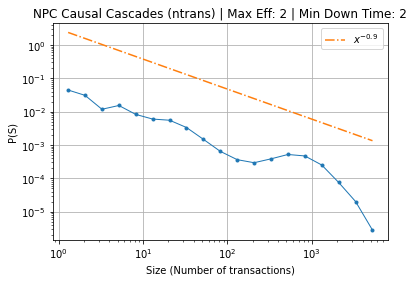

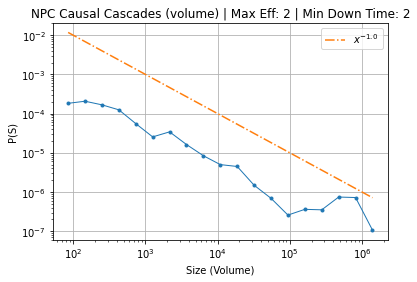

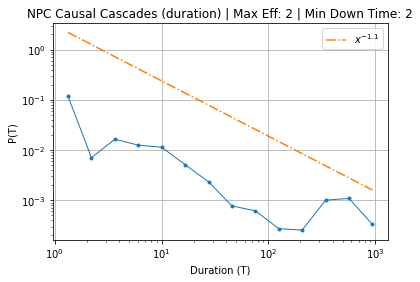

In [16]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9)*3, '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*3, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

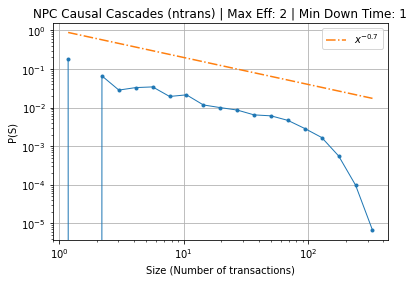

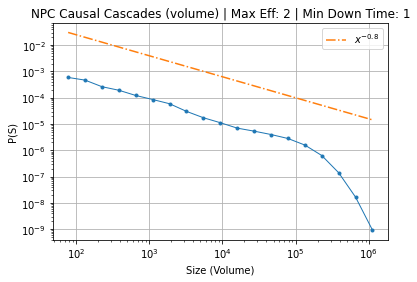

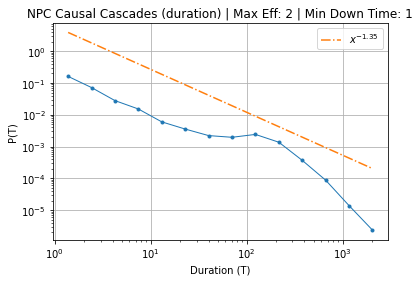

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

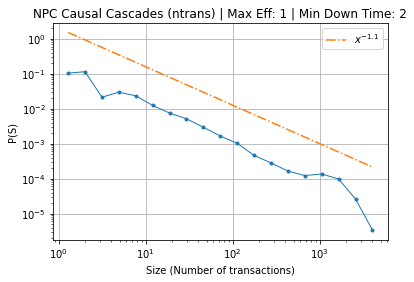

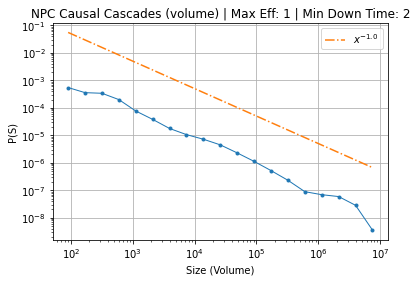

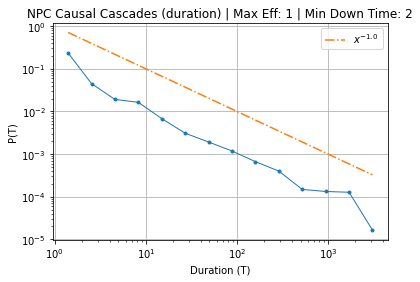

In [13]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*2, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

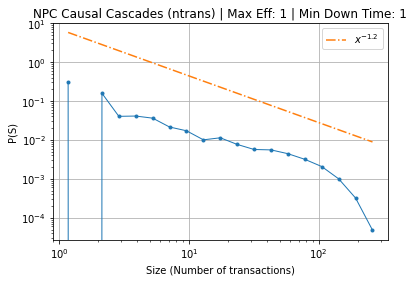

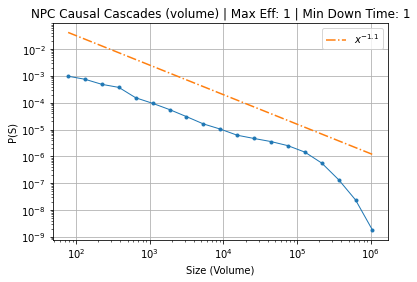

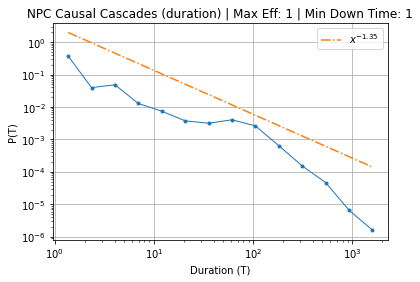

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
